# Generate Simulated Data: Random-Plaintext-Dataset-8

In [2]:
#import python libraries

import unittest
import random
from random import randint
from random import gauss
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import os.path
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
from tqdm import tnrange,tqdm_notebook

In [3]:
# Define lengh for the data set
data_leng = 100000
numberOfSamples = 50

# Define key for encryption
key = 23

# Position of the masked and leakage (index starts with 0)
fieldMaskedLekage = 24
fieldMasked = 4
fieldMasked2 = 44
fieldMasked3 = 20

#Random Plaintext
FixedPlaintext = False

# Define gauss niose
noiseStart = 0.0
noiseEnd = 5.0

# Define jitter shift range
activateJitter = True

if activateJitter == True:
    # Value for jitter 
    jitterLeft = -5
    jitterRight = 5
else:
    jitterLeft = None
    jitterRight = None

# If masked used True 
maskedValue = True

In [4]:
# Define settings table
settingsTable = pd.DataFrame([None])
settingsTable['data_leng'] = pd.DataFrame([data_leng])
settingsTable['numberOfSamples'] = numberOfSamples
settingsTable['key'] = key
settingsTable['noiseStart'] = noiseStart
settingsTable['noiseEnd'] = noiseEnd
settingsTable['jitterLeft'] = jitterLeft
settingsTable['jitterRight'] = jitterRight
settingsTable = settingsTable.drop(0,axis=True)

In [5]:
settingsTable

,data_leng,numberOfSamples,key,noiseStart,noiseEnd,jitterLeft,jitterRight
0,100000,50,23,0.0,5.0,-5,5


In [6]:
# AES Sbox
AES_Sbox = np.array([
            0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
            0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
            0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
            0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
            0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
            0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
            0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
            0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
            0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
            0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
            0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
            0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
            0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
            0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
            0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
            0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16
            ])

In [7]:
# Generate random plaintext
plaintext = []
fixedPlaintext = random.randint(0,255)
mask = []
mask2 = []
mask3 = []
for x in range(data_leng):
    if FixedPlaintext == True:
        plaintext.append(fixedPlaintext)
    else:
        plaintext.append(random.randint(0,255))
    
    mask.append(random.randint(0,255))
    mask2.append(random.randint(0,255))
    mask3.append(random.randint(0,255))

print("plaintext:",plaintext[0:5],'\nmask',mask[0:5],'\nmask2',mask2[0:5],'\nmask3',mask2[0:5])

plaintext: [40, 140, 221, 128, 99] 
mask [207, 128, 214, 176, 230] 
mask2 [55, 154, 96, 20, 127] 
mask3 [55, 154, 96, 20, 127]


In [8]:
# Verify size of plaintext
len(plaintext)

100000

In [9]:
#Generate leaked data with key=23 and labels
leakedData = []
#fixed key
key = 23
labels = []
for d in plaintext:
    leakedData.append(bin((AES_Sbox[d^key])).count("1")+gauss(noiseStart, noiseEnd))
    labels.append(bin(AES_Sbox[d^key]).count("1"))
print("leakedData:",leakedData[0:5],"\nlabels:",labels[0:5])

leakedData: [4.661617857298874, -2.755194683774791, -0.3618260469776695, 6.886477389602186, 11.106712309445186] 
labels: [5, 2, 4, 2, 3]


In [10]:
# Verify size of leakedData 
len(leakedData)

100000

In [11]:
# Verify size of labels 
len(labels)

100000

In [12]:
maskedData = []
maskedNoise = []
maskedNoise2 = []
maskedNoise3 = []
maskIndex = 0
for d in plaintext:
    maskedData.append((bin(((AES_Sbox[d^key])^mask[maskIndex]^mask2[maskIndex])).count("1"))+gauss(noiseStart,noiseEnd))
    maskedNoise.append((bin(mask[maskIndex]).count("1"))+gauss(noiseStart,noiseEnd))
    maskedNoise2.append((bin(mask2[maskIndex]).count("1"))+gauss(noiseStart,noiseEnd))
    maskedNoise3.append((bin(mask3[maskIndex]).count("1"))+gauss(noiseStart,noiseEnd))
    maskIndex = maskIndex + 1
print("maskedData:",maskedData[0:5],"\nmaskedNoise:",maskedNoise[0:5],"\nmaskedNoise2:",maskedNoise2[0:5],"\nmaskedNoise3:",maskedNoise3[0:5])

maskedData: [6.442443694973624, 11.175036199232215, 2.7984160509514293, -3.761074127541738, 4.37346497597725] 
maskedNoise: [3.8088304543683766, 3.1349384716537387, -0.5468991839948876, 5.164229554535505, 7.011868244666937] 
maskedNoise2: [-1.1156587968588125, 8.124053186056821, -8.304109057387048, 6.988675504882331, -0.9230717568578974] 
maskedNoise3: [1.4899228012862125, 11.931502478926252, 3.608409028714123, 2.545350312952126, 4.063440330715389]


In [13]:
# Generate random traces and repalce the t=25 with the leaked data
from collections import deque
rawTraces = []
randomJitter = []
# Loop to generate the traces
for i in tnrange(data_leng):
    rawData=[]
    
    #loop to repalce the sample
    for z in range(numberOfSamples):
        
        # replace sample at 5th position with the mask and added noise 
        if z == fieldMasked:
            rawData.append(maskedNoise[i])
            
        elif z == fieldMaskedLekage:
            rawData.append(maskedData[i])
            
        elif z == fieldMasked3:
            rawData.append(maskedNoise3[i])
            
        elif z == fieldMasked2:
            rawData.append(maskedNoise2[i])     
        # Else create random sample
        else:   
            rawData.append(bin(randint(0,255)).count("1")+gauss(noiseStart,noiseEnd))
    
    # Add jitter
    if activateJitter == True:
        item = deque(rawData)
        tmpJitter = random.randint(jitterLeft,jitterRight)
        item.rotate(tmpJitter)
        randomJitter.append(tmpJitter)
        
        #Full dataset with all traces 
        rawTraces.append(item)
    else:
        rawTraces.append(rawData)

print("First generated trace: ",rawTraces[0])
print("Second generated trace:",rawTraces[1])
print("Third generated trace: ",rawTraces[2])


First generated trace:  deque([5.327342555824747, 3.8088304543683766, 0.8735409058985244, -2.524633658581493, 17.790250306867833, -0.8431435841515906, 3.248774032839806, 3.312010353296264, 1.8132080313789576, 2.0651877547389716, 0.6051632346332849, 0.47265651354276716, -0.223701058446645, 4.1507858310306815, -0.7982424298108604, -0.4115066369312954, 10.628439570762865, 1.4899228012862125, -2.1587618706558542, 2.1128567771054434, 5.824471003530224, 6.442443694973624, 9.532128957147027, -1.5061488941102512, 4.208803063653038, -2.3096614523268943, 4.167989035889065, -4.668818607931547, 1.042082664944009, 11.677371193117487, 1.709144227664215, 3.144200361101718, -1.1861252119950434, 11.079678985647561, 13.437894135533227, 15.041284623856995, 9.757925074610984, 0.7219941384374442, 2.1716546176807827, -0.41440679024489313, 0.15483790047365087, -1.1156587968588125, -2.429841767195781, -0.8121197414090355, 3.7722903798356913, 6.800190995874668, 5.663686699527364, -2.207934271431757, 3.4793438

In [14]:
# Verify size of leakedData 
len(rawTraces)

100000

## Plot Simulated Data

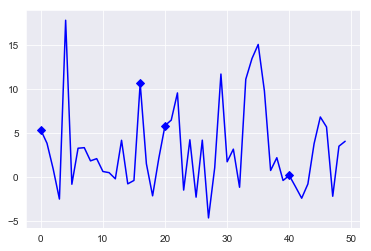

In [15]:
sns.set_style("darkgrid")
plt.plot(rawTraces[0],'-bD',markevery=[fieldMaskedLekage + randomJitter[0]-1,fieldMasked + randomJitter[0]-1,fieldMasked2 + randomJitter[0]-1,fieldMasked3 + randomJitter[0]-1])

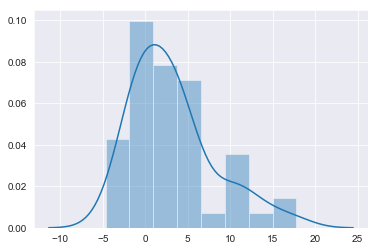

In [16]:
sns.distplot(rawTraces[0])

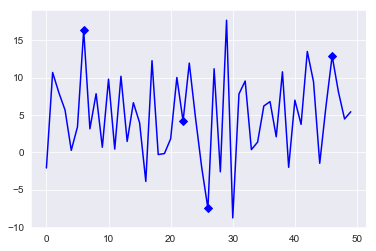

In [17]:
plt.plot(rawTraces[1],'-bD',markevery=[fieldMaskedLekage + randomJitter[1]-1,fieldMasked + randomJitter[1]-1,fieldMasked2 + randomJitter[1]-1,fieldMasked3 + randomJitter[1]-1])

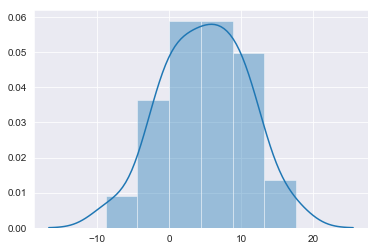

In [18]:
sns.distplot(rawTraces[1])

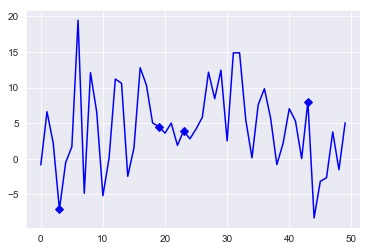

In [19]:
plt.plot(rawTraces[2],'-bD',markevery=[fieldMaskedLekage + randomJitter[2]-1,fieldMasked + randomJitter[2]-1,fieldMasked2 + randomJitter[2]-1,fieldMasked3 + randomJitter[2]-1])

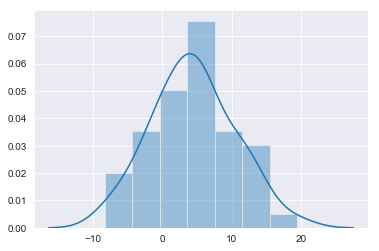

In [20]:
sns.distplot(rawTraces[2])

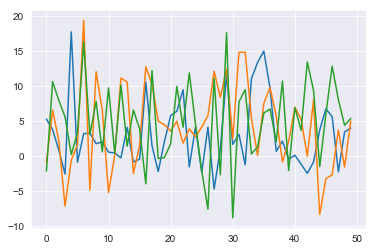

In [21]:
plt.plot(rawTraces[0],'-',rawTraces[2],'-',rawTraces[1],'-',markevery=[fieldMaskedLekage,fieldMasked])

### Data Path

In [22]:
#Set data path
dataPath = ''
if FixedPlaintext == True:
    dataPath = 'FixedPlaintext'
else:
    dataPath = 'RandomPlaintext'

### Unit Tests

In [23]:
class TestNotebook(unittest.TestCase):

    def test_LeakedData_size_equals_labels(self):
        self.assertEqual(len(leakedData), len(labels))
    def test_DataSize(self):
        self.assertEqual(len(leakedData), data_leng)    
        self.assertEqual(len(labels), data_leng)
    def test_FixedPlaintext(self):
        self.assertEqual(FixedPlaintext, False) 
    def test_Jitter(self):
        self.assertEqual(activateJitter, True)
    def test_Mask(self):
        self.assertEqual(maskedValue, True)
    def test_DataPath(self):
        self.assertEqual(dataPath, 'RandomPlaintext')
    
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_DataPath (__main__.TestNotebook) ... ok
test_DataSize (__main__.TestNotebook) ... ok
test_FixedPlaintext (__main__.TestNotebook) ... ok
test_Jitter (__main__.TestNotebook) ... ok
test_LeakedData_size_equals_labels (__main__.TestNotebook) ... ok
test_Mask (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.033s

OK


In [24]:
rawTraces = pd.DataFrame(rawTraces)
rawTraces['label'] = pd.DataFrame(plaintext)
rawTraces.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,label
0,5.327343,3.808830,0.873541,-2.524634,17.790250,-0.843144,3.248774,3.312010,1.813208,2.065188,...,-1.115659,-2.429842,-0.812120,3.772290,6.800191,5.663687,-2.207934,3.479344,4.040228,40
1,-2.111512,10.681819,7.983032,5.646198,0.252600,3.387490,16.323667,3.134938,7.835315,0.666743,...,3.729290,13.494400,9.447366,-1.484083,6.096064,12.894216,8.124053,4.451026,5.420195,140
2,-0.865508,6.603193,2.218099,-7.121066,-0.546899,1.684441,19.456980,-4.832905,12.092933,6.584241,...,5.307585,0.023593,8.041774,-8.304109,-3.168878,-2.661064,3.767091,-1.525936,5.062999,221
3,-2.085978,5.164230,-3.486377,0.619459,7.663291,-0.725454,10.116265,13.207509,0.996067,0.394414,...,6.988676,2.622805,2.810960,-1.035515,6.525397,9.171642,11.377876,-2.545417,10.375012,128
4,0.093850,4.606552,5.891983,8.406715,9.755244,0.341373,7.011868,4.949272,-1.764895,3.876588,...,3.180501,6.072559,-1.350990,-0.080283,5.311835,-0.923072,2.427364,4.948018,-4.715317,99


### Write Data 

In [25]:
simulated_traces = pd.DataFrame(rawTraces)
simulated_traces.to_csv('./'+dataPath+'/TS8.csv',index=False)